C:\Users\michi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


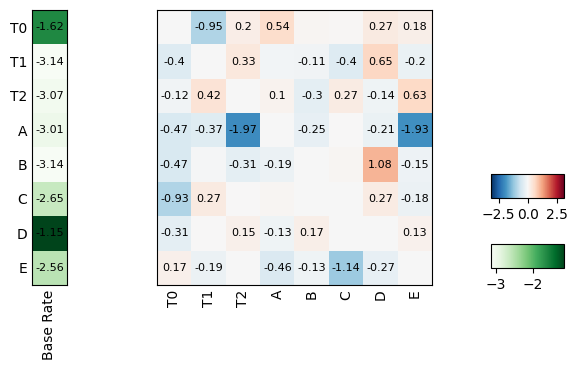

loading from mbonart_checkpoints/rmg0/mhn_SET
loading from mbonart_checkpoints/rmg0/mhn_TRAINED


(<matplotlib.image.AxesImage at 0x212d217fb90>,
 <matplotlib.colorbar.Colorbar at 0x212d4897410>)

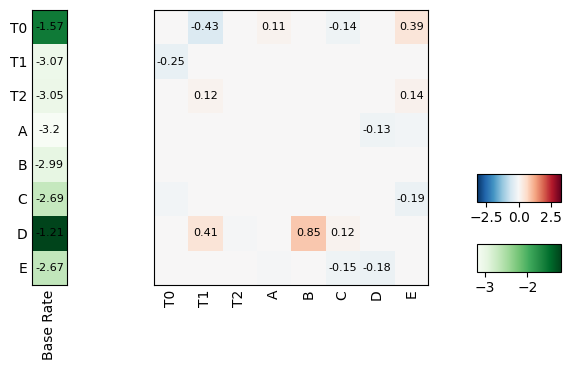

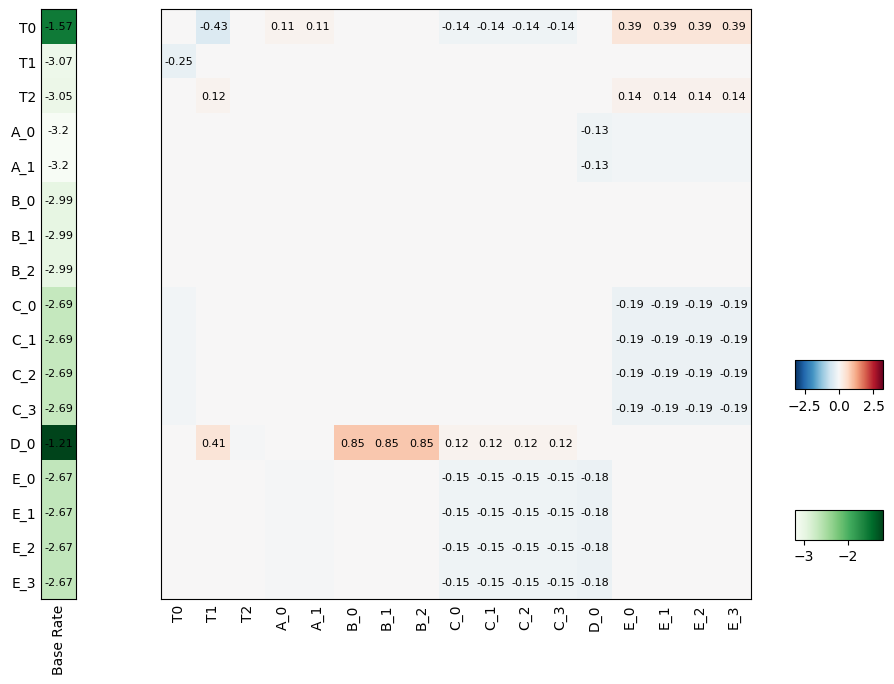

In [1]:
import sys

sys.path.append("..")


import mhn
import ClusterableMhnGenerator as cmg
import RandomMHNGenerator as rmg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(3,5)
rand_generator = rmg.RandomMHNGenerator(cl_generator.getEvents())
rand_generator.randomizeBaseRates()
rand_generator.getMHN().log_theta[4,6]=1
rand_generator.getMHN().log_theta[3,7]=-2
rand_generator.getMHN().log_theta[2,4]=-0.3
rand_generator.getMHN().log_theta[7,5]=-0.9
rand_generator.getMHN().log_theta[0,1]=-1.2
rand_generator.getMHN().log_theta[2,1]=0.4
rand_generator.getMHN().log_theta[3,2]=-1.8
rand_generator.getMHN().log_theta[1,5]=-0.5
rand_generator.getMHN().log_theta[2,7]=0.8
rand_generator.getMHN().log_theta[0,3]=0.8
rand_generator.getMHN().log_theta[5,0]=-1.0

rand_generator.addNoise(0.2)

rand_generator.getMHN().plot()
plt.show()

#rand_generator.do_training_iteration(sample_num=10000,)
#rand_generator.saveto("mbonart_checkpoints/rmg0")
rand_generator.loadfrom("mbonart_checkpoints/rmg0")

cl_generator.setClusterMHN(rand_generator.getMHN())
#cl_generator.addNoiseOffDiags(0.1)

cl_generator.getMHN().plot()
#dont randomize baserates again?
cl_generator.splitClusters([2,3,4,1,4])#.randomizeBaseRates().addNoiseOffDiags(0.01,cl_generator.CMG_Domain.TOTAL)
#generator.addNoiseOffDiags(0.2, generator.CMG_Domain.CLUSTER, generator.CMG_Domain.TEST)

ground_truth_mhn = cl_generator.getMHN()
ground_truth_mhn.plot()

In [5]:
sampled_data=ground_truth_mhn.sample_artificial_data(100000, as_dataframe=True)

#compute distances based on the distances of redcued MHNs including the test events T1,..,TN
test_events= cl_generator.events[cl_generator.CMG_Step.SPLIT][cl_generator.CMG_Domain.TEST]
events= cl_generator.events[cl_generator.CMG_Step.SPLIT][cl_generator.CMG_Domain.CLUSTER]

print(sampled_data)


       T0  T1  T2  A_0  A_1  B_0  B_1  B_2  C_0  C_1  C_2  C_3  D_0  E_0  E_1  \
0       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
1       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
2       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
3       0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
4       0   0   0    0    0    0    0    0    0    0    0    0    1    0    0   
...    ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
99996   0   0   0    0    0    0    0    0    1    0    0    0    0    0    0   
99997   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
99998   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0   
99999   1   0   1    0    0    0    0    0    0    0    1    1    1    0    0   

       E_2  E_3  
0        

In [6]:
import EventDistanceMeasurer as edm

dist_measurer=edm.EventDistanceMeasurer(test_events, events)
dist_measurer.load_data(sampled_data)
dist_measurer.train_All_MHNs()
dist_measurer.saveto("mbonart_checkpoints/edm2")
#dist_measurer.loadfrom("mbonart_checkpoints/mhn0")


C:\Users\michi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mhn\optimizers.py:430: UserWarning: Optimal lambda is at a limit (min/max) of the given search range. Consider re-running with adjusted search range.
  warnings.warn(


training MHN for event A_0
training MHN for event A_1
training MHN for event B_0
training MHN for event B_1
training MHN for event B_2
training MHN for event C_0
training MHN for event C_1
training MHN for event C_2
training MHN for event C_3
training MHN for event D_0
training MHN for event E_0
training MHN for event E_1
training MHN for event E_2
training MHN for event E_3


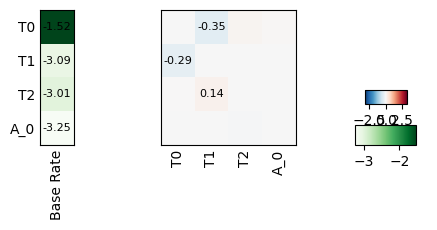

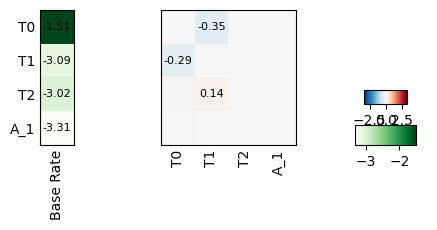

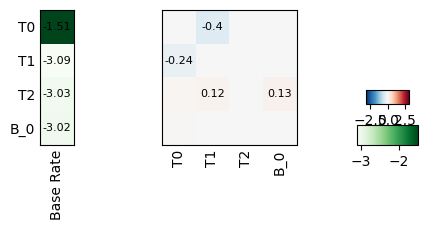

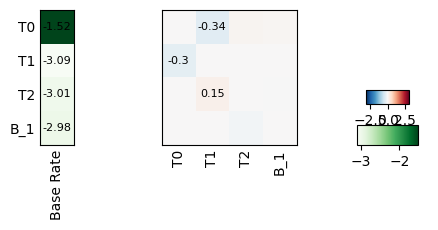

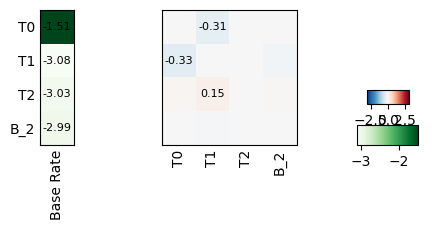

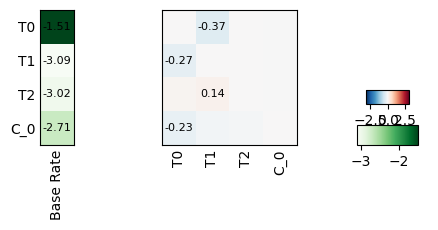

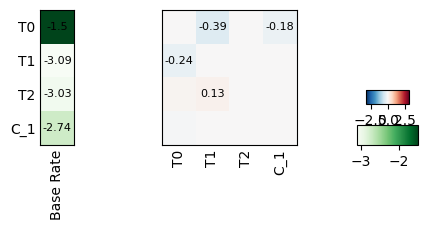

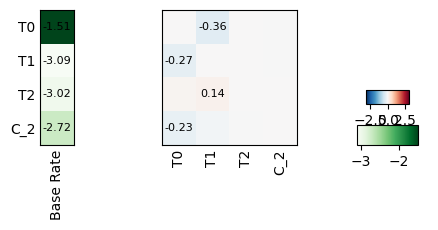

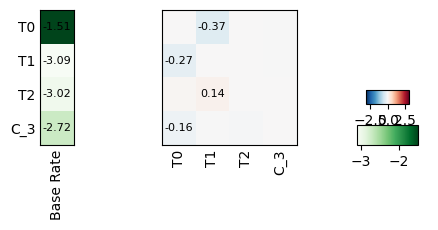

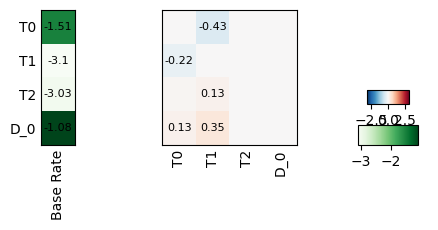

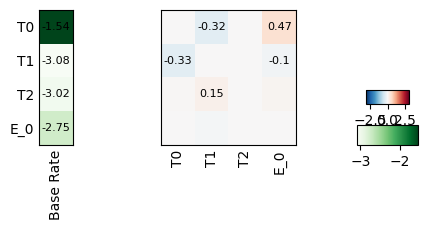

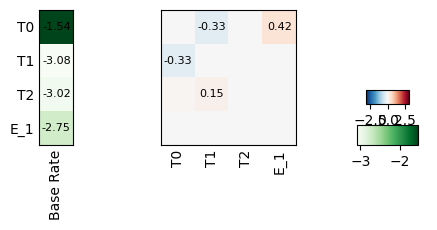

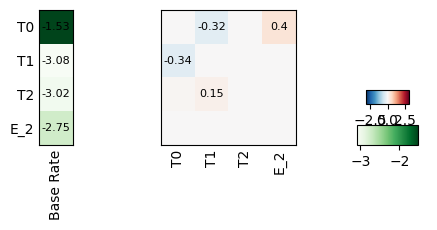

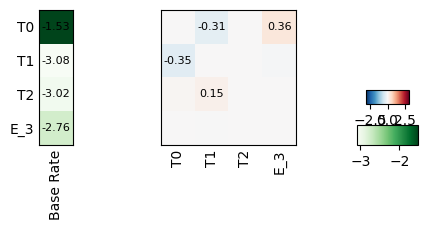

In [7]:
for ev in events:
    dist_measurer._mhns[ev].plot()

get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x000001C9AB4E4360>


<Axes: >

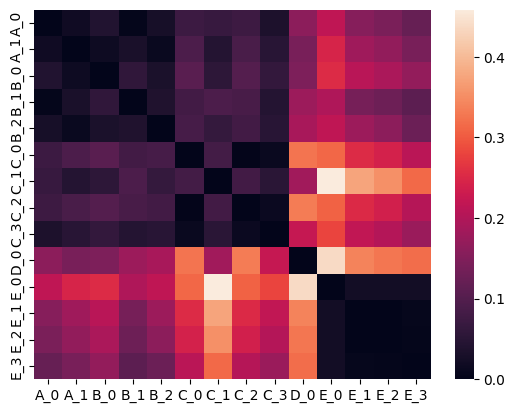

In [12]:
dist_measurer.compute_distance_matrix(dist_measurer.DistMeasure.OFFDIAG_EUCLID)
sns.heatmap(dist_measurer._dist_mat)

C:\Users\michi\AppData\Local\Temp\ipykernel_29772\2013450603.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [65.0, 65.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [77.5, 77.5, 122.5, 122.5],
  [55.0, 55.0, 100.0, 100.0],
  [23.75, 23.75, 77.5, 77.5],
  [5.0, 5.0, 50.625, 50.625]],
 'dcoord': [[0.0, 0.04771142420846379, 0.04771142420846379, 0.0],
  [0.0, 0.08750302851901769, 0.08750302851901769, 0.04771142420846379],
  [0.0, 0.20757523937117348, 0.20757523937117348, 0.08750302851901769],
  [0.0, 0.05120605432954192, 0.05120605432954192, 0.0],
  [0.0, 0.06845188090914672, 0.06845188090914672, 0.0],
  [0.05120605432954192,
   0.06999414261207862,
   0.06999414261207862,
   0.06845188090914672],
  [0.0, 0.07315394726192159, 0.07315394726192159, 0.06999414261207862],
  [0.0, 0.015630738946063965, 0.015630738946063965, 0.0],
  [0.0, 0.15590715185648155, 0.15590715185648155, 0.0156

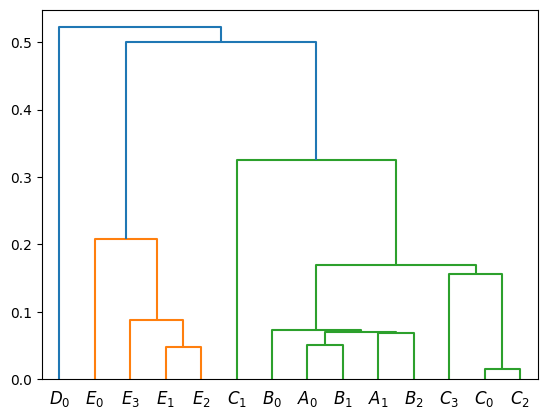

In [13]:
import scipy.spatial
import scipy.cluster

#condensed_dist_mat=scipy.spatial.distance.squareform(dist_measurer._dist_mat)

linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)
scipy.cluster.hierarchy.dendrogram(linkage, labels= [f"${ev}$" for ev in dist_measurer._events])